In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def load_and_process_data(file_path):
    """Load and process the publication data"""
    df = pd.read_csv(file_path)
    
    # Filter years and ensure data quality
    df = df[df['publication_year'].between(2019, 2023)]  # Adjust based on your actual data range
    
    # Get top 5 subfields
    top_subfields = df.groupby('subfield_display_name')['count'].sum().nlargest(5).index
    df_top = df[df['subfield_display_name'].isin(top_subfields)]
    
    return df_top

def create_country_plots(df, save_path=None):
    """Create publication trend plots with country facets and styled legend"""
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.1)
    palette = sns.color_palette("husl", n_colors=5)
    markers = ['o', 's', 'D', '^', 'v']

    # Create facet grid
    g = sns.relplot(
        data=df,
        x="publication_year",
        y="count",
        hue="subfield_display_name",
        style="subfield_display_name",
        col="country_code",
        col_wrap=2,
        kind="line",
        palette=palette,
        markers=markers,
        dashes=False,
        height=4,
        aspect=1.3,
        linewidth=2,
        markersize=8,
        facet_kws={'sharey': False, 'sharex': True},
        legend=False  # We'll create custom legend
    )

    # Customize axes
    g.set_axis_labels("Publication Year", "Publication Count", fontsize=12)
    g.set_titles("Country: {col_name}", fontsize=13, pad=10)
    
    # Format x-axis
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlim(2018.5, 2024.5)
        ax.grid(True, alpha=0.3)

    # Create unified legend
    handles, labels = [], []
    for artist, label in zip(*g.axes[0].get_legend_handles_labels()):
        if label not in labels:  # Avoid duplicates
            handles.append(artist)
            labels.append(label)
    
    # Add legend at bottom
    plt.figlegend(
        handles=handles,
        labels=labels,
        loc='lower center',
        ncol=1,  # Single column for 5 rows
        bbox_to_anchor=(0.5, -0.05),
        frameon=True,
        title="Subfields",
        title_fontsize=12,
        fontsize=11,
        columnspacing=1.5,
        handletextpad=0.5
    )

    # Adjust layout
    plt.subplots_adjust(bottom=0.15)  # Make space for legend
    g.fig.suptitle("Publication Trends by Country and Subfield (2019-2024)", 
                  fontsize=15, y=1.02)

    # Save figure
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

/var/folders/zh/rwkwxcd54wz4bgdkytcrldvh0000gn/T/ipykernel_64430/3504933748.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.figlegend(


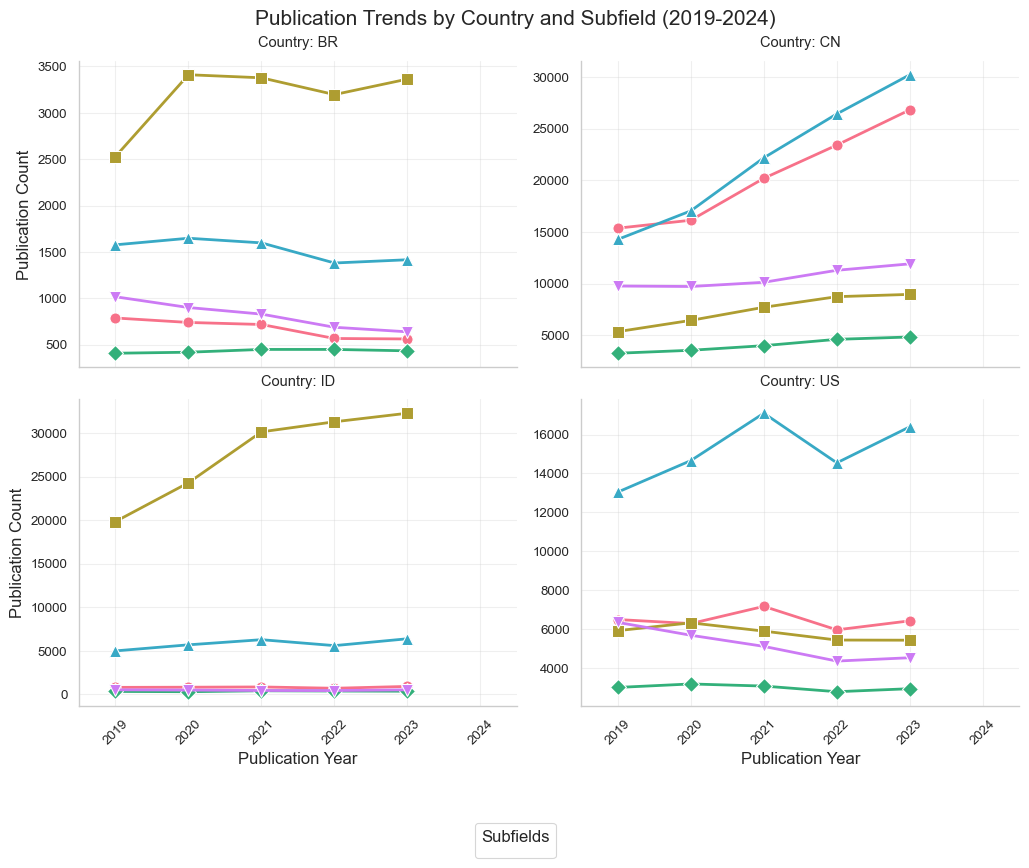

In [2]:
 # Load and process data
data_path = "../data/csv/_counts/combined_publication_counts.csv"
# save_path = "../visualizations/country_subfield_trends.png"

df = load_and_process_data(data_path)

# Create and save visualization
create_country_plots(df)

In [3]:
# Save high-resolution image
# plt.savefig("publication_trends.png", dpi=300, bbox_inches='tight')
plt.show()